#### Week 19 - Homework

###### Angela Spencer - February 9, 2022

##### 1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

Considerations for Preprocessing:
- Train-test-split
- scaling - StandardScaler, Normalizer, MinMaxScaler, AbsScaler
- oversampling/undersampling
- SMOTE-ENN for imbalanced classification
- PCA and NMF for dimensionality reduction
- GridSearchCV / RandomizedSearchCV
- t-SNE visualization

Supervised Learning Models:
- Linear Regression
        - a linear approach to regression problems
        - can be accomplished with 2 or more features
        - fits  a line to the data which is the decision boundary
        - accuracy metric - loss function (MSE/ RMSE, MAE), the squared differences betweem the predicted line and the actual observation
        
- Logistic Regression
        - similar to Linear Regression, applied to classification problems
        - can be accomplished with 2 or more features
        - output is probabilites that an observation is in a given class
        - accuracy metrics are accuracy/precision/recall to compare the predicted class to the actual class
        
- K Nearest Neighbors
        - Linear Classification and Regression
        - uses the label/value of surrounding neighbors to predict the lbael/value of a new sample
        - k is the number of neighbors to look at, can be tuned by running a series of models with a range of k values and choosing the k value with the highest accuracy for the model
        
- Support Vector Machines
        - Linear Classification and Regression problems
        - support vectors from the training set are samples that are near the decision boundary and help to define it
        - unseen samples are labeled based on this decision boundary
        - hinge loss and L2 regularization - regularization strength can be used to tune model 
        - accuracy metrics are precision/recall/accuracy for classification and loss functions (MSE/RMSE/MAE) for regression problems

- Decision Trees: Decision Tree, RandomForest, XGBoost 
        - Classification and Regression Decision Trees
        - Able to capture non-linear relationships
        - does not require scaling of features
        - creates a series of if-else questions about individual features to ultimately derive predictions
        - visualized by a series of decision nodes that split into branches
        - accuracy metrics are precision/recall/accuracy for classification problems and loss function (MSE/RMSE/MAE) for regression problems
        
- Neural Networks / Deep Learning: Keras/TensorFlow/Pytorch
        - Classification and Regression Neural Networks
        - A network of connections represent the non-linear relationships between input data and predictions
        - number of hidden layers between input and output determine the complexity of the model and simulate the relationships between input and output
        - network model is iterative and weights between nodes in the network are updated with each iteration using activation functions
        - activation function and parameters can be tuned to optimize model
        - accuracy is measured by lowering the loss function

##### 2. Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.
 

Unsupervised Learning Models:
- KMeans Clustering
        - KMeans find clusters of samples based on non-linear realtionships between features
        - Number of clusters can be determined by running the model with a range of cluster numbers and plotting the inertia of each one, creating an Elbow Plot. Inertia is a measure of the spread of each cluster (the distance from each individual sample to the centroid of the cluster. At the point in the The ideal number of clusters is found in the Elbow plot at the point where inertia is no longer significantly decreasing.
        
- Hierarchical / Agglomerative Clustering
        - A method of visualizing clustering.
        - a single feature is enterd as the labels or leaves of the dendrogram and clusters are formed based on non-linear relationships until the root of the dendrogram forms into a single cluster.
        - The ideal number of clusters is found by visualizing a hortizontal line running through the plot. At the point where the length of the intersecting branches is longest, counting the number of interscting branches equals the ideal number of clusters.

##### 3. Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?


In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import Normalizer

In [3]:
purchases = pd.read_csv('../Datasets/ecommerce.csv', encoding = 'unicode_escape')
print(purchases.shape)
purchases.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#view data types
purchases.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
#view null values
purchases.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### Drop Rows with problematic values

In [6]:
# Price Column
# Drop rows with 0 or negative values
purchases = purchases[purchases['UnitPrice']>0]

In [7]:
# Country column
# Drop 'Unspecified' and 'European Community' rows
purchases = purchases[purchases['Country'].str.contains('Unspecified|European Community')==False]
purchases['Country'].value_counts()

United Kingdom          492979
Germany                   9493
France                    8556
EIRE                      8192
Spain                     2532
Netherlands               2367
Belgium                   2069
Switzerland               2001
Portugal                  1519
Australia                 1256
Norway                    1085
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
RSA                         57
Lebanon                     45
Lithuania                   35
Brazil  

In [8]:
# InvoiceNo column
# Drop all credit and adjusted invoices
purchases = purchases[purchases['InvoiceNo'].str.contains('C|A')==False]
purchases

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
# StockCode column
# drop rows for postage amounts, manually entered invoices, and Amazon Fees
purchases = purchases[purchases['StockCode'].str.contains('DOT|AMAZONFEE')==False]
purchases = purchases[purchases['StockCode']!= 'M']

#reset index after dropping rows
purchases.reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
528563,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
528564,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
528565,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
528566,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


###### Handling Null Values

In [10]:
## Convert Null Customers IDs to corresponding Invoice ID

#df of purchases where customer ID is null
null_cust = purchases[purchases['CustomerID'].isnull()]

print('Number of rows with null CustomerID: {:}'.format(null_cust.shape[0]))

#group df of null customers by Invoice Numbers
null_cust_invoice_grouped = null_cust.groupby('InvoiceNo')

#view unique Invoices with null customer IDs
#produces an array
null_cust_unique_invoices = np.unique(null_cust['InvoiceNo'])

#number of unique invoices that have no customer ID
print('Number of unique InvoiceNos with null CustomerID: {:}'.format(null_cust_unique_invoices.shape[0]))

Number of rows with null CustomerID: 131288
Number of unique InvoiceNos with null CustomerID: 1392


In [11]:
# replace null CustomerID with invoice number
null_cust['CustomerID'] = [x for x in null_cust['InvoiceNo']]
null_cust

C:\Users\aspen\AppData\Local\Temp/ipykernel_9432/709420673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_cust['CustomerID'] = [x for x in null_cust['InvoiceNo']]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,536544,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,536544,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,536544,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,536544,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,536544,United Kingdom
...,...,...,...,...,...,...,...,...
541535,581498,85049e,SCANDINAVIAN REDS RIBBONS,4,12/9/2011 10:26,3.29,581498,United Kingdom
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,581498,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,581498,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,581498,United Kingdom


In [12]:
#drop all rows with null values in CustomerId column
purchases = purchases[purchases['CustomerID'].notnull()]

#add modified customer IDs to original df
purchases = purchases.append(null_cust)

In [13]:
#reset index after dropping rows
purchases.reset_index()
purchases

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541535,581498,85049e,SCANDINAVIAN REDS RIBBONS,4,12/9/2011 10:26,3.29,581498,United Kingdom
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,581498,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,581498,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,581498,United Kingdom


In [14]:
#check for remaining null values
purchases.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##### Convert datatypes and Categorical encoding - purchases df

In [15]:
purchases.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [16]:
#convert Invoice Date to datetime
purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])

In [17]:
#Convert Invoice column to numeric
purchases['InvoiceNo'] = pd.to_numeric(purchases['InvoiceNo'])

In [18]:
#encode StockCode, Country, and CustomerID columns using pd.factorize()
purchases['StockCode_enc'], StockCode_uniques = pd.factorize(purchases['StockCode'])
purchases['Country_enc'], Country_uniques = pd.factorize(purchases['Country'])
purchases['CustomerID_enc'], CustomerID_uniques = pd.factorize(purchases['CustomerID'])

In [19]:
# drop redundant columns
purchases.drop(['StockCode', 'Country', 'CustomerID', 'Description'], axis=1, inplace=True)

In [20]:
purchases.dtypes

InvoiceNo                  int64
Quantity                   int64
InvoiceDate       datetime64[ns]
UnitPrice                float64
StockCode_enc              int64
Country_enc                int64
CustomerID_enc             int64
dtype: object

##### Feature Engineering

In [21]:
#groupby customer id and invoice date
customer_first_purchase = purchases.groupby(['CustomerID_enc'])['InvoiceDate'].min().reset_index()
customer_first_purchase

,CustomerID_enc,InvoiceDate
0,0,2010-12-01 08:26:00
1,1,2010-12-01 08:34:00
2,2,2010-12-01 08:45:00
3,3,2010-12-01 09:00:00
4,4,2010-12-01 09:09:00
...,...,...
5717,5717,2011-12-08 16:14:00
5718,5718,2011-12-08 16:30:00
5719,5719,2011-12-09 10:03:00
5720,5720,2011-12-09 10:23:00


In [22]:
#find first invoice month per customer
customer_first_purchase = customer_first_purchase.rename(columns={'InvoiceDate':'FirstInvoice'})
customer_first_purchase

,CustomerID_enc,FirstInvoice
0,0,2010-12-01 08:26:00
1,1,2010-12-01 08:34:00
2,2,2010-12-01 08:45:00
3,3,2010-12-01 09:00:00
4,4,2010-12-01 09:09:00
...,...,...
5717,5717,2011-12-08 16:14:00
5718,5718,2011-12-08 16:30:00
5719,5719,2011-12-09 10:03:00
5720,5720,2011-12-09 10:23:00


In [23]:
#create a matrix of months for each customer
min_month = customer_first_purchase['FirstInvoice'].values.astype('datetime64[M]').min()
max_month = customer_first_purchase['FirstInvoice'].values.astype('datetime64[M]').max()
month_matrix = pd.DataFrame(pd.date_range(min_month, max_month, freq='MS'), columns = ['Month'])
month_matrix

,Month
0,2010-12-01
1,2011-01-01
2,2011-02-01
3,2011-03-01
4,2011-04-01
5,2011-05-01
6,2011-06-01
7,2011-07-01
8,2011-08-01
9,2011-09-01


In [24]:
#merge month matrix and df
customer_first_purchase['key'] = 1
month_matrix['key'] = 1

#merge month matrix onto df
customer_monthly = customer_first_purchase.merge(month_matrix, on='key')
customer_monthly

,CustomerID_enc,FirstInvoice,key,Month
0,0,2010-12-01 08:26:00,1,2010-12-01
1,0,2010-12-01 08:26:00,1,2011-01-01
2,0,2010-12-01 08:26:00,1,2011-02-01
3,0,2010-12-01 08:26:00,1,2011-03-01
4,0,2010-12-01 08:26:00,1,2011-04-01
...,...,...,...,...
74381,5721,2011-12-09 10:26:00,1,2011-08-01
74382,5721,2011-12-09 10:26:00,1,2011-09-01
74383,5721,2011-12-09 10:26:00,1,2011-10-01
74384,5721,2011-12-09 10:26:00,1,2011-11-01


In [25]:

customer_monthly = customer_monthly[customer_monthly['Month']>=customer_monthly['FirstInvoice']]
customer_monthly

,CustomerID_enc,FirstInvoice,key,Month
1,0,2010-12-01 08:26:00,1,2011-01-01
2,0,2010-12-01 08:26:00,1,2011-02-01
3,0,2010-12-01 08:26:00,1,2011-03-01
4,0,2010-12-01 08:26:00,1,2011-04-01
5,0,2010-12-01 08:26:00,1,2011-05-01
...,...,...,...,...
73800,5676,2011-11-30 14:30:00,1,2011-12-01
73813,5677,2011-11-30 14:38:00,1,2011-12-01
73826,5678,2011-11-30 14:46:00,1,2011-12-01
73839,5679,2011-11-30 15:13:00,1,2011-12-01


In [26]:
#calculate total sales per month per customer
purchases['Month'] = purchases['InvoiceDate'].values.astype('datetime64[M]')
purchases['TotalSale'] = purchases['UnitPrice']* purchases['Quantity']

sales_monthly = purchases.groupby(['CustomerID_enc', 'Month'])[['TotalSale']].agg('sum').reset_index()

sales_monthly

,CustomerID_enc,Month,TotalSale
0,0,2010-12-01,5391.21
1,1,2010-12-01,366.63
2,1,2011-02-01,458.90
3,1,2011-03-01,427.15
4,1,2011-05-01,419.00
...,...,...,...
14415,5717,2011-12-01,3.35
14416,5718,2011-12-01,5699.00
14417,5719,2011-12-01,6756.06
14418,5720,2011-12-01,3217.20


In [27]:
country_df = purchases[['Country_enc', 'CustomerID_enc']]
country_df = country_df.drop_duplicates(subset=['CustomerID_enc'])
country_df

,Country_enc,CustomerID_enc
0,0,0
9,0,1
26,1,2
46,0,3
65,0,4
...,...,...
539162,0,5717
539207,0,5718
540451,0,5719
541264,0,5720


In [28]:
sales_monthly = sales_monthly.merge(country_df, how='inner')
sales_monthly.rename(columns={'TotalSale':'MonthlySales'}, inplace=True)

#final dataframe of monthly sales by customer
sales_monthly

,CustomerID_enc,Month,MonthlySales,Country_enc
0,0,2010-12-01,5391.21,0
1,1,2010-12-01,366.63,0
2,1,2011-02-01,458.90,0
3,1,2011-03-01,427.15,0
4,1,2011-05-01,419.00,0
...,...,...,...,...
14415,5717,2011-12-01,3.35,0
14416,5718,2011-12-01,5699.00,0
14417,5719,2011-12-01,6756.06,0
14418,5720,2011-12-01,3217.20,0


##### Create a df of aggregated info for each customer

In [29]:
# create total invoices column
purchases['NoInvoices'] = 1
purchases

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,StockCode_enc,Country_enc,CustomerID_enc,Month,TotalSale,NoInvoices
0,536365,6,2010-12-01 08:26:00,2.55,0,0,0,2010-12-01,15.30,1
1,536365,6,2010-12-01 08:26:00,3.39,1,0,0,2010-12-01,20.34,1
2,536365,8,2010-12-01 08:26:00,2.75,2,0,0,2010-12-01,22.00,1
3,536365,6,2010-12-01 08:26:00,3.39,3,0,0,2010-12-01,20.34,1
4,536365,6,2010-12-01 08:26:00,3.39,4,0,0,2010-12-01,20.34,1
...,...,...,...,...,...,...,...,...,...,...
541535,581498,4,2011-12-09 10:26:00,3.29,3703,0,5721,2011-12-01,13.16,1
541536,581498,5,2011-12-09 10:26:00,4.13,138,0,5721,2011-12-01,20.65,1
541537,581498,4,2011-12-09 10:26:00,4.13,60,0,5721,2011-12-01,16.52,1
541538,581498,1,2011-12-09 10:26:00,4.96,232,0,5721,2011-12-01,4.96,1


In [30]:
# perform aggregate calculations on columns
purchases_agg = purchases.groupby(['CustomerID_enc']).agg({'Quantity':np.sum,
                                                         'UnitPrice':np.mean, 
                                                         'Month': np.max,
                                                         'TotalSale': np.sum,
                                                          'NoInvoices': np.sum,
                                                          'Country_enc': np.max}).reset_index()
purchases_agg

,CustomerID_enc,Quantity,UnitPrice,Month,TotalSale,NoInvoices,Country_enc
0,0,1733,3.960370,2010-12-01,5391.21,297,0
1,1,1390,3.926082,2011-10-01,3232.59,171,0
2,2,5060,3.103603,2011-12-01,7281.38,247,1
3,3,439,3.996429,2011-09-01,948.25,28,0
4,4,80,10.950000,2011-01-01,876.00,3,0
...,...,...,...,...,...,...,...
5717,5717,2,1.675000,2011-12-01,3.35,2,0
5718,5718,1747,4.320946,2011-12-01,5699.00,634,0
5719,5719,2010,4.175904,2011-12-01,6756.06,730,0
5720,5720,654,6.269661,2011-12-01,3217.20,59,0


In [31]:
# rename columns
rename = {'Country_enc':'Country_enc', 
          'UnitPrice': 'AverageItemPrice',
          'Quantity': 'TotalItems', 
         'Month': 'LastPurchaseMonth',
         'TotalSale': 'TotalSales', 
         'NoInvoice': 'TotalNoInvoices'}
purchases_agg.rename(columns=rename, inplace=True)

purchases_agg

,CustomerID_enc,TotalItems,AverageItemPrice,LastPurchaseMonth,TotalSales,NoInvoices,Country_enc
0,0,1733,3.960370,2010-12-01,5391.21,297,0
1,1,1390,3.926082,2011-10-01,3232.59,171,0
2,2,5060,3.103603,2011-12-01,7281.38,247,1
3,3,439,3.996429,2011-09-01,948.25,28,0
4,4,80,10.950000,2011-01-01,876.00,3,0
...,...,...,...,...,...,...,...
5717,5717,2,1.675000,2011-12-01,3.35,2,0
5718,5718,1747,4.320946,2011-12-01,5699.00,634,0
5719,5719,2010,4.175904,2011-12-01,6756.06,730,0
5720,5720,654,6.269661,2011-12-01,3217.20,59,0


##### Convert datatime for Normalizer below

In [32]:
purchases_agg['LastPurchaseMonth'] = purchases_agg['LastPurchaseMonth'].dt.month
purchases_agg.dtypes

CustomerID_enc         int64
TotalItems             int64
AverageItemPrice     float64
LastPurchaseMonth      int64
TotalSales           float64
NoInvoices             int64
Country_enc            int64
dtype: object

In [33]:
sales_monthly['Month'] = sales_monthly['Month'].dt.month
sales_monthly.dtypes

CustomerID_enc      int64
Month               int64
MonthlySales      float64
Country_enc         int64
dtype: object

###### Keep a df for labeling, before normalization

In [34]:
sales_monthly_labels = sales_monthly
purchases_agg_labels = purchases_agg

##### Normalize

In [35]:
# view stats, variance, standard deviation, mean
purchases_agg.describe()

,CustomerID_enc,TotalItems,AverageItemPrice,LastPurchaseMonth,TotalSales,NoInvoices,Country_enc
count,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000
mean,2860.500000,974.596994,3.846740,8.544914,1809.061921,92.374694,0.720552
std,1651.943451,4419.826911,8.169608,3.284743,7905.240222,210.272427,3.400139
min,0.000000,1.000000,0.060000,1.000000,0.420000,1.000000,0.000000
25%,1430.250000,104.000000,2.268144,6.000000,232.770000,14.000000,0.000000
50%,2860.500000,314.000000,3.134497,10.000000,613.720000,40.000000,0.000000
75%,4290.750000,803.500000,4.363698,11.000000,1577.780000,106.000000,0.000000
max,5721.000000,196915.000000,434.650000,12.000000,280206.020000,7838.000000,35.000000


In [36]:
# instantiate and apply Normalizer
purchases_norm = Normalizer().fit_transform(purchases_agg)

#output is an array
purchases_norm_df = pd.DataFrame(purchases_norm, columns = purchases_agg.columns)
purchases_norm_df.describe()

,CustomerID_enc,TotalItems,AverageItemPrice,LastPurchaseMonth,TotalSales,NoInvoices,Country_enc
count,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000
mean,0.794979,0.186570,0.001534,0.003378,0.341849,0.024348,0.000250
std,0.299780,0.186538,0.004218,0.005413,0.300219,0.030430,0.001345
min,0.000000,0.000175,0.000007,0.000009,0.000095,0.000009,0.000000
25%,0.697600,0.036266,0.000603,0.001529,0.080424,0.004777,0.000000
50%,0.960088,0.110708,0.000930,0.002551,0.243423,0.013607,0.000000
75%,0.995674,0.311323,0.001462,0.003338,0.603331,0.033727,0.000000
max,1.000000,0.974578,0.148698,0.144117,0.997475,0.271223,0.024775


In [37]:
sales_monthly.describe()

,CustomerID_enc,Month,MonthlySales,Country_enc
count,14420.000000,14420.000000,14420.000000,14420.000000
mean,1905.767406,7.251803,717.853836,0.654230
std,1507.659271,3.465049,2460.435511,2.943088
min,0.000000,1.000000,0.420000,0.000000
25%,644.000000,4.000000,195.145000,0.000000
50%,1528.000000,8.000000,344.580000,0.000000
75%,2880.250000,10.000000,639.680000,0.000000
max,5721.000000,12.000000,168469.600000,35.000000


In [38]:
# instantiate and apply Normalizer
sales_monthly_norm = Normalizer().fit_transform(sales_monthly)

#output is an array
sales_monthly_norm_df = pd.DataFrame(sales_monthly_norm, columns = sales_monthly.columns)
sales_monthly_norm_df.describe()

,CustomerID_enc,Month,MonthlySales,Country_enc
count,14420.000000,14420.000000,14420.000000,14420.000000
mean,0.836102,0.006285,0.367114,0.000428
std,0.258943,0.008447,0.314650,0.002176
min,0.000000,0.000013,0.000095,0.000000
25%,0.803639,0.001951,0.105950,0.000000
50%,0.966898,0.003167,0.254887,0.000000
75%,0.994361,0.006960,0.595101,0.000000
max,1.000000,0.145852,1.000000,0.042441


##### 4. Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

I approached this in several ways, starting with less complex models and increasing complexity to see the results. The ideal number of clusters seems to be 2. I used an Elbow plot to determine this and used the inertia values as a metric for model performance (attempting to lower inertia without adding too much complexity). I also used the visual look of clusters to determine performance.  

In [39]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [40]:
display(purchases_norm_df.head(2))
display(sales_monthly_norm_df.head(2))

,CustomerID_enc,TotalItems,AverageItemPrice,LastPurchaseMonth,TotalSales,NoInvoices,Country_enc
0,0.000000,0.305606,0.000698,0.002116,0.950714,0.052375,0.0
1,0.000284,0.394557,0.001114,0.002839,0.917583,0.048539,0.0


,CustomerID_enc,Month,MonthlySales,Country_enc
0,0.000000,0.002226,0.999998,0.0
1,0.002726,0.032713,0.999461,0.0


In [54]:
X = purchases_norm_df[['AverageItemPrice', 'TotalSales', 'Country_enc', 'LastPurchaseMonth']].to_numpy()
#X = sales_monthly_norm_df[['MonthlySales']].to_numpy()
#X = purchases_norm_df[['Country_enc', 'CustomerID_enc', 'TotalPrice', 'Quantity']].to_numpy()
#X = purchases2[['Country_enc', 'TotalPrice']].to_numpy()
X 

array([[6.98392184e-04, 9.50713841e-01, 0.00000000e+00, 2.11614203e-03],
       [1.11443384e-03, 9.17583438e-01, 0.00000000e+00, 2.83853949e-03],
       [3.49884753e-04, 8.20866472e-01, 1.12735013e-04, 1.35282016e-03],
       ...,
       [4.58573725e-04, 7.41911577e-01, 0.00000000e+00, 1.31777085e-03],
       [9.50601844e-04, 4.87789730e-01, 0.00000000e+00, 1.81943204e-03],
       [9.09943076e-04, 5.64851801e-01, 0.00000000e+00, 1.71569274e-03]])

In [55]:
# Find best number of clusters using inertias and distortions of KMeans for cluster numbers 1-6
inertias = []
distortions = []

ns = range(1,6,1)

for n in ns:
    #instantiate and fit KMeans model
    model = KMeans(n_clusters=n)
    model.fit(X)
    
    #extract inertia from model, append to list
    inertias.append(model.inertia_)
    
    #extract distortion from model, append to list
    distortion = sum(np.square(np.min(cdist(X, model.cluster_centers_,
                     'euclidean'), axis=1))) / X.shape[0]
    distortions.append(distortion)

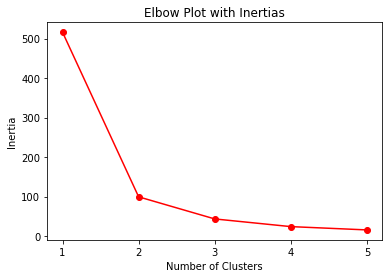

In [56]:
#plot inertias of models
plt.plot(ns, inertias, '-o', c='r')
plt.title('Elbow Plot with Inertias')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ns)
plt.show()

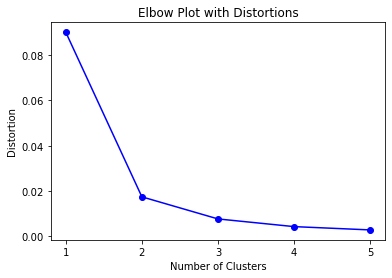

In [57]:
#plot distortions of models
plt.plot(ns, distortions, '-o', c='b')
plt.title('Elbow Plot with Distortions')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.xticks(ns)
plt.show()

In [63]:
kmeans = KMeans(n_clusters = 2)
labels = kmeans.fit_predict(X)
purchases_norm_df['Labels'] = labels
purchases_norm_df

,CustomerID_enc,TotalItems,AverageItemPrice,LastPurchaseMonth,TotalSales,NoInvoices,Country_enc,Labels
0,0.000000,0.305606,0.000698,0.002116,0.950714,0.052375,0.000000,1
1,0.000284,0.394557,0.001114,0.002839,0.917583,0.048539,0.000000,1
2,0.000225,0.570439,0.000350,0.001353,0.820866,0.027846,0.000113,1
3,0.002870,0.419949,0.003823,0.008609,0.907099,0.026785,0.000000,1
4,0.004547,0.090937,0.012447,0.001137,0.995762,0.003410,0.000000,1
...,...,...,...,...,...,...,...,...
5717,0.999997,0.000350,0.000293,0.002099,0.000586,0.000350,0.000000,0
5718,0.690228,0.210883,0.000522,0.001449,0.687935,0.076531,0.000000,1
5719,0.628028,0.220727,0.000459,0.001318,0.741912,0.080164,0.000000,1
5720,0.867263,0.099159,0.000951,0.001819,0.487790,0.008946,0.000000,1


In [64]:

ct = pd.crosstab(purchases_norm_df['Labels'], 
                 [purchases_norm_df['AverageItemPrice'], purchases_norm_df['TotalSales'], purchases_norm_df['Country_enc']])
display(ct)

#ct = pd.crosstab(cust_groupby_labels['Labels'], [cust_groupby_labels['TotalPurchases'], cust_groupby_labels['LastPurchaseMonth']])


AverageItemPrice 0.000007 0.000009 0.000010 0.000012 0.000016 0.000017  \
TotalSales       0.818156 0.901164 0.720795 0.000277 0.940954 0.970831   
Country_enc      0.000009 0.000000 0.000000 0.000000 0.000000 0.000000   
Labels                                                                   
0                       0        0        0        1        0        0   
1                       1        1        1        0        1        1   

AverageItemPrice                   0.000019 0.000020  ... 0.038875 0.040744  \
TotalSales       0.083443 0.716545 0.661797 0.850099  ... 0.194374 0.921027   
Country_enc      0.000000 0.000000 0.000000 0.000014  ... 0.000000 0.000000   
Labels                                                ...                     
0                       1        0        0        0  ...        1        0   
1                       0        1        1        1  ...        0        1   

AverageItemPrice 0.054483 0.056914 0.078158 0.092449 0.097435 0.115041  \
TotalSales       0.831611 0.188322 0.934868 0.369798 0.097435 0.230082   
Country_enc      0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
Labels                                                                   
0                       0        1        0        1        1        1   
1                       1        0        1        0        0        0   

AverageItemPrice 0.119497 0.148698  
TotalSales       0.955977 0.297397  
Country_enc      0.000000 0.000000  
Labels                              
0                       0        1  
1                       1        0  

[2 rows x 5722 columns]

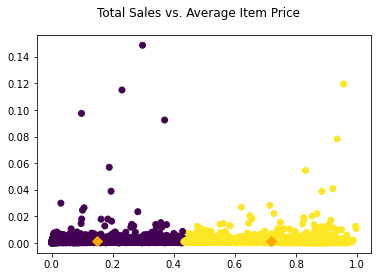

In [65]:
#
xs = purchases_norm_df['TotalSales']
#
ys = purchases_norm_df['AverageItemPrice']

centroids = kmeans.cluster_centers_
centroids_x = centroids[:,1]
centroids_y = centroids[:,0] 

plt.scatter(xs, ys, c=labels)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, c='orange')
plt.suptitle('Total Sales vs. Average Item Price')
plt.show()

## Plot Sales vs. Country here, switch axes

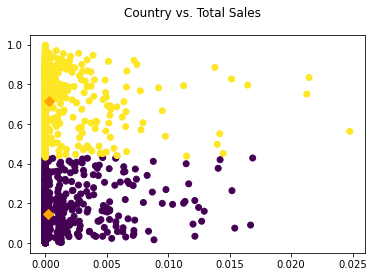

In [66]:
#
x2 = purchases_norm_df['Country_enc']
#
y2 = purchases_norm_df['TotalSales']

centroids = kmeans.cluster_centers_
centroids_x2 = centroids[:,2]
centroids_y2 = centroids[:,1] 

plt.scatter(x2, y2, c=labels)
plt.scatter(centroids_x2, centroids_y2, marker='D', s=50, c='orange')
plt.suptitle('Country vs. Total Sales')
plt.show()

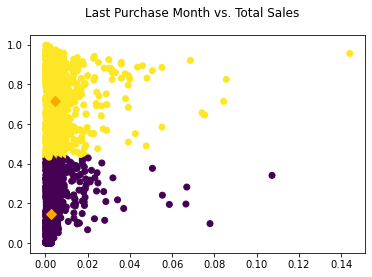

In [67]:
#
x3 = purchases_norm_df['LastPurchaseMonth']
#
y3 = purchases_norm_df['TotalSales']

centroids = kmeans.cluster_centers_
centroids_x3 = centroids[:,3]
centroids_y3 = centroids[:,1] 

plt.scatter(x3, y3, c=labels)
plt.scatter(centroids_x3, centroids_y3, marker='D', s=50, c='orange')
plt.suptitle('Last Purchase Month vs. Total Sales')
plt.show()

In [48]:
centroids

array([[0.45083356],
       [0.12329169],
       [0.88043068]])

In [68]:
kmeans.score(X)

-99.37134482247815

##### 5. Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?


In [69]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [46]:
#dendro_labels = cust_groupby['Country_enc'].to_list()

In [72]:
x = purchases_norm_df[['AverageItemPrice', 'TotalSales']].to_numpy()

#X = purchases_norm_df[['AverageItemPrice', 'TotalSales', 'Country_enc', 'LastPurchaseMonth']].to_numpy()

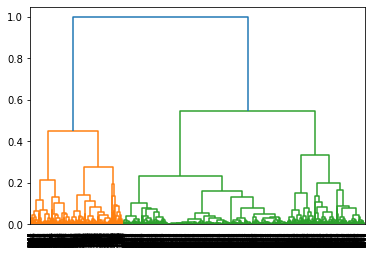

<Figure size 1440x1440 with 0 Axes>

In [70]:
mergings = linkage(X, method='complete')
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)

dendro1 = plt.figure(figsize=(20,20))
plt.show()

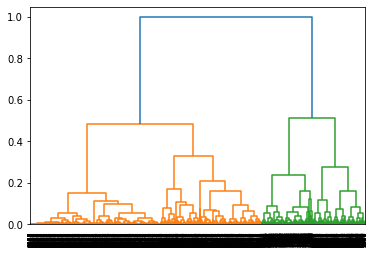

<Figure size 1440x1440 with 0 Axes>

In [73]:
mergings = linkage(x, method='complete')
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)
dendro2 = plt.figure(figsize=(20,20))
plt.show()

##### 6. Compare the results of 4 and 5. Which approach do you think is best? Why?

The two models seem to have clustered data in a similar way. I liked having more control over the KMeans model, but the Dendrogram model gave a better visualization of the relationships between clusters.

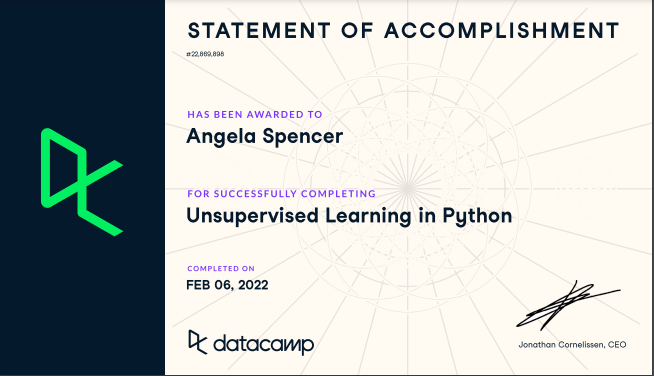